In [151]:
import pandas as pd

data = pd.read_csv('dataset_ok_water.csv', sep=',', encoding = "ISO-8859 -1")
data.head()

,ph,dureza,turbidez,metales,resultado
0,0.2,3.0,1.1,0.1,potable-recomendada
1,NaN,3.0,1.3,0.2,potable-recomendada
2,4.4,3.2,1.3,0.2,potable-recomendada
3,4.4,2.9,1.4,0.2,potable-recomendada
4,4.5,2.3,1.3,0.3,potable-recomendada


# 1

In [152]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ph         144 non-null    float64
 1   dureza     149 non-null    float64
 2   turbidez   147 non-null    float64
 3   metales    145 non-null    float64
 4   resultado  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [153]:
print(data.isnull().sum().sort_values(ascending = False))

ph           6
metales      5
turbidez     3
dureza       1
resultado    0
dtype: int64


In [154]:
mean_ph = data['ph'].mean()
mean_metals = data['metales'].mean()
mean_turbidez = data['turbidez'].mean()
mean_hardness = data['dureza'].mean()
data['metales'].fillna(mean_metals, inplace = True)
data['turbidez'].fillna(mean_turbidez, inplace = True)
data['ph'].fillna(mean_ph, inplace = True)
data['dureza'].fillna(mean_hardness, inplace = True)
data.head()

<ipython-input-154-85cb54915c87>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['metales'].fillna(mean_metals, inplace = True)
<ipython-input-154-85cb54915c87>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,ph,dureza,turbidez,metales,resultado
0,0.200000,3.0,1.1,0.1,potable-recomendada
1,5.813889,3.0,1.3,0.2,potable-recomendada
2,4.400000,3.2,1.3,0.2,potable-recomendada
3,4.400000,2.9,1.4,0.2,potable-recomendada
4,4.500000,2.3,1.3,0.3,potable-recomendada


In [155]:
print(data.isnull().sum().sort_values(ascending = False))

ph           0
dureza       0
turbidez     0
metales      0
resultado    0
dtype: int64


He elegido rellenar los datos que no tienen valor, con la media, ya que luego al comprabar sus correlaciones con los metodos de pearson y demas, nos será más fácil ya que no nos daran problemas de compilación.

In [156]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ph         150 non-null    float64
 1   dureza     150 non-null    float64
 2   turbidez   150 non-null    float64
 3   metales    150 non-null    float64
 4   resultado  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# 2

In [157]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder

selector = VarianceThreshold(threshold = 0.25) # Umbral de varianza para seleccionar caracteristicas
print(data.info())
newData = OrdinalEncoder().fit_transform(data[['ph','turbidez','dureza', 'metales', 'resultado']])
selector.fit_transform(newData)
sel = selector.fit(newData)
print(sel.get_support())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ph         150 non-null    float64
 1   dureza     150 non-null    float64
 2   turbidez   150 non-null    float64
 3   metales    150 non-null    float64
 4   resultado  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
[ True  True  True  True  True]


In [158]:
from sklearn.preprocessing import Normalizer

newData = OrdinalEncoder().fit_transform(data[['ph','turbidez','dureza','metales', 'resultado']])
normalizedData = Normalizer().fit_transform(newData)
print(pd.DataFrame(normalizedData).corr(method = 'pearson'))

          0         1         2         3         4
0  1.000000  0.292852 -0.531015  0.268852 -0.460854
1  0.292852  1.000000 -0.914653  0.798601 -0.701436
2 -0.531015 -0.914653  1.000000 -0.845516  0.770546
3  0.268852  0.798601 -0.845516  1.000000 -0.699316
4 -0.460854 -0.701436  0.770546 -0.699316  1.000000


Como podemos ver en el coeficiente de relación de pearson, ciertas columnas se correlacionan mejor que con otras. Por ejemplo el ph y la dureza del agua, o los metales y la turbidez. También podemos observar que cuanto más potable el agua es, más se aleja de que sea turbia o contenga muchos metales.

In [159]:
import numpy as np

#Rangos intercuartiles en ph

Q1 = np.quantile(data['ph'], 0.25)
Q3 = np.quantile(data['ph'], 0.75)
IQR = Q3 - Q1
k = 1.5 #Mucho mejor usar 1.5 que 3 en este caso. Mejor estimación
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}] en ph")
for i in data['ph']:
    if i < xL  or i > xU:
        print(f" El dato[{i}] es un outlier")
        data = data.drop(data[data['ph'] == i].index) #Eliminamos los outlayers para no afectar a nuestro rango

#Rangos intercuartiles en dureza

Q1 = np.quantile(data['dureza'], 0.25)
Q3 = np.quantile(data['dureza'], 0.75)
IQR = Q3 - Q1
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}] en dureza")
for i in data['dureza']:
    if i < xL  or i > xU:
        print(f" El dato[{i}] es un outlier")
        data = data.drop(data[data['dureza'] == i].index)

#Rangos intercuartiles en turbidez

Q1 = np.quantile(data['turbidez'], 0.25)
Q3 = np.quantile(data['turbidez'], 0.75)
IQR = Q3 - Q1
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}] en turbidez")
for i in data['dureza']:
    if i < xL  or i > xU:
        print(f" El dato[{i}] es un outlier")
        data = data.drop(data[data['turbidez'] == i].index)

#Rangos intercuartiles en metales

Q1 = np.quantile(data['metales'], 0.25)
Q3 = np.quantile(data['metales'], 0.75)
IQR = Q3 - Q1
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}] en metales")
for i in data['metales']:
    if i < xL  or i > xU:
        print(f" El dato[{i}] es un outlier")
        data = data.drop(data[data['metales'] == i].index)

Bandas: [3.1499999999999986,8.350000000000001] en ph
 El dato[0.2] es un outlier
Bandas: [2.05,4.05] en dureza
 El dato[2.0] es un outlier
 El dato[12.0] es un outlier
 El dato[4.1] es un outlier
 El dato[4.2] es un outlier
 El dato[4.4] es un outlier
Bandas: [-3.649999999999999,10.349999999999998] en turbidez
Bandas: [-1.95,4.05] en metales
 El dato[8.0] es un outlier


Para valores atípicos y outlayers, he cogido los rangos intercuartiles y aquellos valores que esten fuera de estos los he mostrado por pantalla para saber cuales son y saber si van a influir en el modelo final. Como creo que podrían influir he decidido eliminarlos.

# 3

## PH, dureza y turbidez

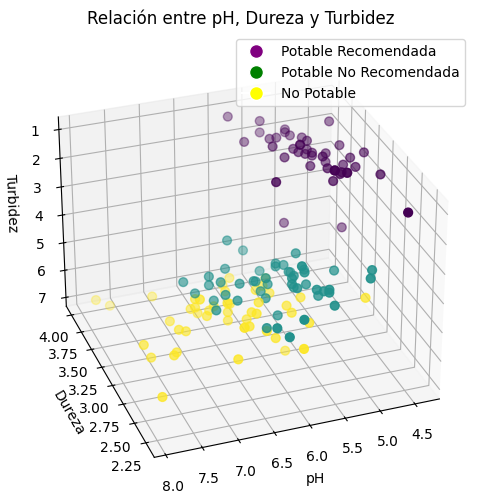

In [160]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib.lines import Line2D

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Crear un mapeo de colores para las categorías
color_map = {
    'potable-recomendada': 0,
    'potable-no-recomendada': 1,
    'no-potable': 2
}

# Convertir las categorías a colores
colors = data['resultado'].map(color_map)

scatter = ax.scatter(
    data['ph'],
    data['dureza'],
    data['turbidez'],
    c = colors,
    s=40,
    cmap=plt.get_cmap("viridis")  # Colormap para distinguir las clases
)

# Configurar títulos y etiquetas
ax.set_title("Relación entre pH, Dureza y Turbidez")
ax.set_xlabel("pH")
ax.set_ylabel("Dureza")
ax.set_zlabel("Turbidez")

# Añadir leyenda personalizada

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Potable Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Potable No Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='No Potable'),
]
ax.legend(handles=legend_elements, loc='best')

plt.show()

En esta visualización de los datos podemos ver como la relación entre la dureza y el ph da como resultado un agua no potable mientras que con la turbidez baja y el ph más alto es más recomendable

## pH, dureza y metales

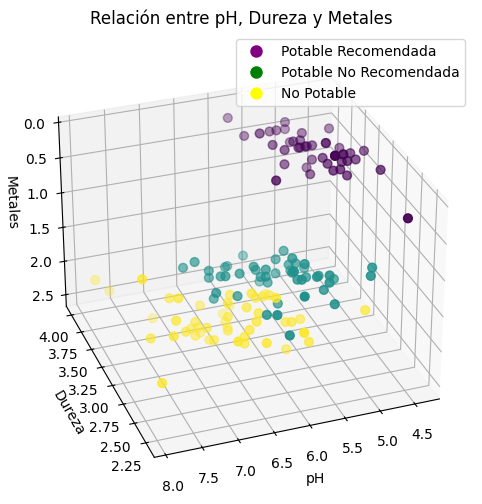

In [161]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    data['ph'],
    data['dureza'],
    data['metales'],
    c = colors,
    s=40,
    cmap=plt.get_cmap("viridis")  # Colormap para distinguir las clases
)

# Configurar títulos y etiquetas
ax.set_title("Relación entre pH, Dureza y Metales")
ax.set_xlabel("pH")
ax.set_ylabel("Dureza")
ax.set_zlabel("Metales")

# Añadir leyenda personalizada

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Potable Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Potable No Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='No Potable'),
]
ax.legend(handles=legend_elements, loc='best')

plt.show()

Podemos obervar como hemos comentado anteriormente que la dureza y los metales estan relacionados inversamente, a mayor dureza y menores metales más potable el agua es al igual que más ph y menos metales.

## pH, turbidez y metales

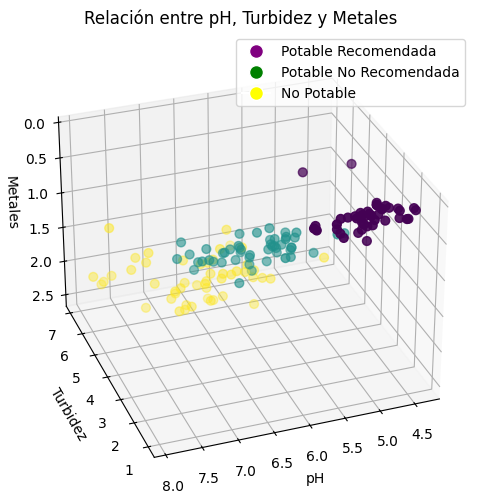

In [162]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    data['ph'],
    data['turbidez'],
    data['metales'],
    c = colors,
    s=40,
    cmap=plt.get_cmap("viridis")  # Colormap para distinguir las clases
)

# Configurar títulos y etiquetas
ax.set_title("Relación entre pH, Turbidez y Metales")
ax.set_xlabel("pH")
ax.set_ylabel("Turbidez")
ax.set_zlabel("Metales")

# Añadir leyenda personalizada

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Potable Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Potable No Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='No Potable'),
]
ax.legend(handles=legend_elements, loc='best')

plt.show()

Aqui podemos confirmar que co un ph más alto y una turbidez más bajo nos da como resultado un agua más potable confirmando además que menos metales nos da ese resultado.

## dureza, turbidez y metales

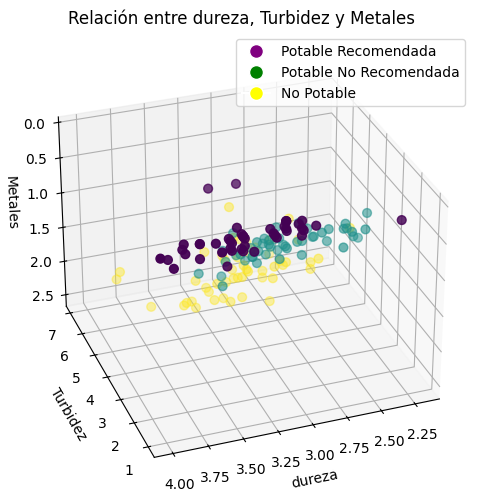

In [163]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    data['dureza'],
    data['turbidez'],
    data['metales'],
    c = colors,
    s=40,
    cmap=plt.get_cmap("viridis")  # Colormap para distinguir las clases
)

# Configurar títulos y etiquetas
ax.set_title("Relación entre dureza, Turbidez y Metales")
ax.set_xlabel("dureza")
ax.set_ylabel("Turbidez")
ax.set_zlabel("Metales")

# Añadir leyenda personalizada

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Potable Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Potable No Recomendada'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='No Potable'),
]
ax.legend(handles=legend_elements, loc='best')

plt.show()

## Mapa de calor

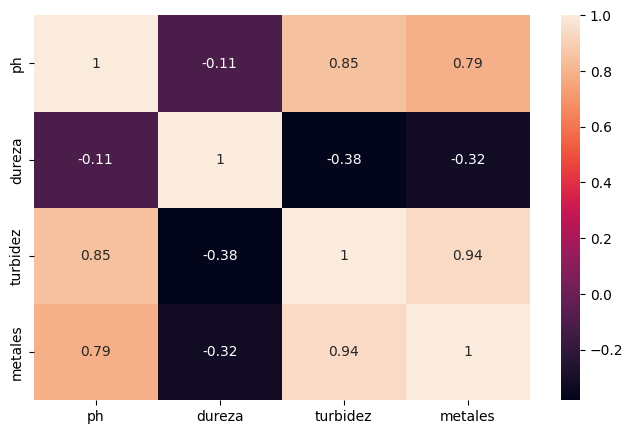

In [164]:
import seaborn as sns

plt.figure(figsize=(8,5))
numeric_data = data[['ph', 'dureza', 'turbidez', 'metales']]
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

En el mapa de calor podemos confirmar las visualizaciones y el conocimiento extraido de los datos anteriores. Vemos como la dureza nos da coeficientes negativos con respecto a la turbidez y los metales lo que indica que cuanta más presencia haya de estos dos, menos potable será.

# 4

In [165]:
from sklearn.model_selection import train_test_split

# Combinar datos
X = np.column_stack((data['ph'], data['dureza'], data['turbidez'], data['metales']))
y = data['resultado']

# Dividir el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #hacemos un split de 70/30

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN model: {accuracy}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy of the KNN model: 0.9767441860465116

Classification Report:
                        precision    recall  f1-score   support

            no-potable       1.00      0.94      0.97        16
potable-no-recomendada       0.92      1.00      0.96        12
   potable-recomendada       1.00      1.00      1.00        15

              accuracy                           0.98        43
             macro avg       0.97      0.98      0.98        43
          weighted avg       0.98      0.98      0.98        43



Podemos ver con el modelo KNN que ha tenido una precisión muy alta del 0.97. Con ello podemos decir con practicamente seguridad que el modelo clasifica bien la potabilidad del agua.

## Matriz de confusión

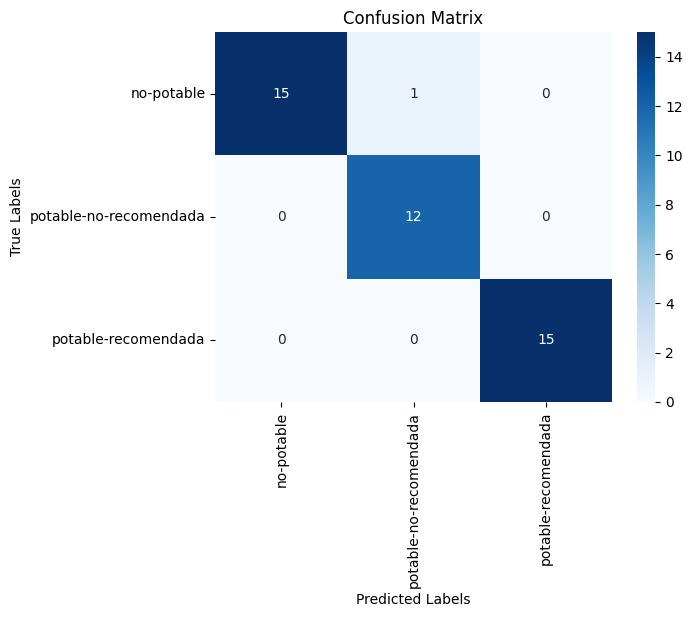

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

En la matriz de confusión podemos observar que el agua potable recomendada y la no recomendada no tienen ningun falso verdadero nada más que la que es potable no reomendada que difiere en 1 de 12. Por lo que podemos concluir que nuestro modelo se ha entrenado bien del dataset que hemos preparado.

In [168]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN model: {accuracy}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy of the KNN model: 0.9767441860465116

Classification Report:
                        precision    recall  f1-score   support

            no-potable       1.00      0.94      0.97        16
potable-no-recomendada       0.92      1.00      0.96        12
   potable-recomendada       1.00      1.00      1.00        15

              accuracy                           0.98        43
             macro avg       0.97      0.98      0.98        43
          weighted avg       0.98      0.98      0.98        43



Probando con otros datos de entrada como el número de vecinos distinto, observamos que no hay mucha diferencia con respecto al anterior. Podemos seguir viendo la fiabilidad de nuestro modelo con una equivacación mínima en el agua potable no recomendada. Con respecto a las otras dos, sigue siendo igual.

# 5

Precisión del modelo de árbol de decisión: 0.9302325581395349


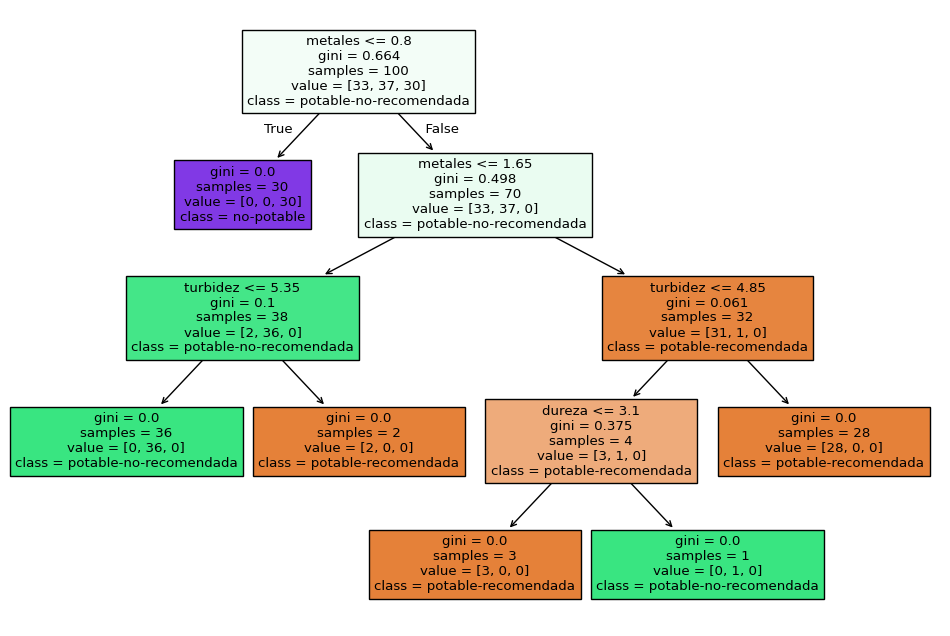

In [169]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = decision_tree_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Precisión del modelo de árbol de decisión: {accuracy_tree}')

# Representar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=['ph', 'dureza', 'turbidez', 'metales'], class_names=y.unique())
plt.show()

En el árbol de decisión podemos ver que la fiabilidad llega a ser menor que la del KNN. También, podemos ver el camino que ha tomado para llegar a esa fiabilidad. Vemos como a tomado la decisión mediante la cantidad de metalez que deriba a las otras características del dataset.

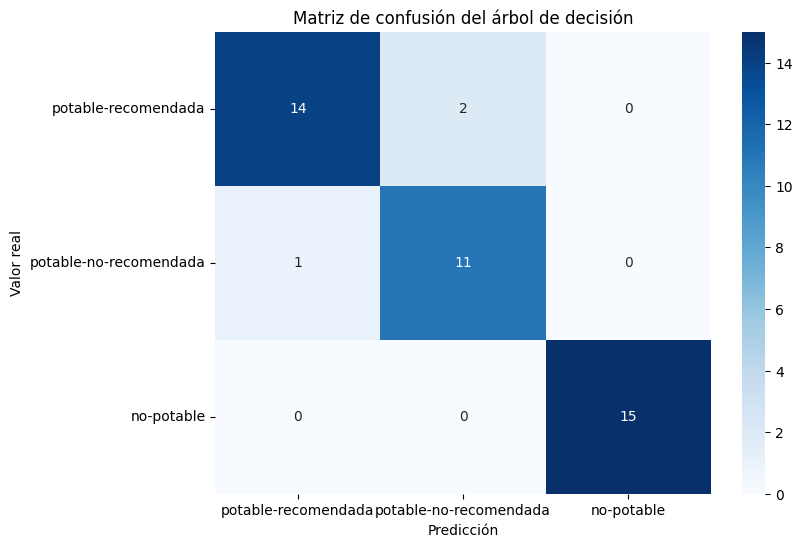

In [170]:
# Mostrar la matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues",
            xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión del árbol de decisión")
plt.show()

Podemos ver que la matriz de confusión del árbol, al ser menos preciso que la del KNN, llega a tener más falsos positivos. Por lo que aunque a aumentado el número, el modelo sigue siendo bastante fiable.

# 6

## RN (Perceptron multicapa)

In [171]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo de red neuronal
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_mlp = mlp_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Precisión del modelo de red neuronal: {accuracy_mlp}')

print(classification_report(y_test, y_pred_mlp))

Precisión del modelo de red neuronal: 0.9767441860465116
                        precision    recall  f1-score   support

            no-potable       1.00      0.94      0.97        16
potable-no-recomendada       0.92      1.00      0.96        12
   potable-recomendada       1.00      1.00      1.00        15

              accuracy                           0.98        43
             macro avg       0.97      0.98      0.98        43
          weighted avg       0.98      0.98      0.98        43



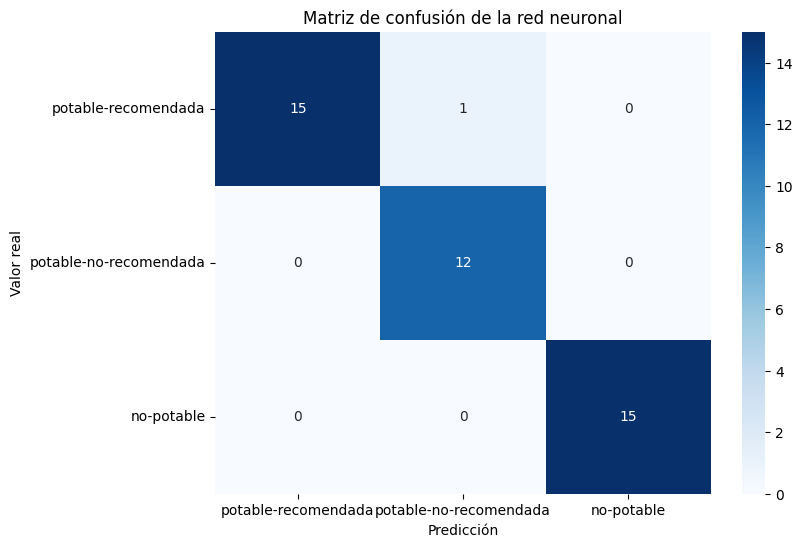

In [172]:
# Mostrar la matriz de confusión
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues",
            xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión de la red neuronal")
plt.show()

Por último con la red neuronal RN, el modelo llega a la misma fiabilidad que KNN. Por lo que la conclusión es la misma.